**LOAD THE DATASET**

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
df.shape

(5000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

###**1. EXPLORATORY DATA ANALYSIS**

**a) Analyze the distribution of categorical features such as Card_Type, Merchant_Category,
Location, etc.**

In [ ]:
categorical_cols =  df.select_dtypes(include=['object']).columns     # IDENTIFY THE CATEGORICAL COLUMNS
print(categorical_cols)

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')


In [ ]:
#Check Unique Value count in Categorical Columns:
for col in categorical_cols:
  print(f"{col}: {df[col].nunique()}")

Transaction_ID: 5000
Card_Type: 4
Merchant_Category: 8
Transaction_DateTime: 5000
Location: 13
Region: 4
Cardholder_Gender: 2
Device_Type: 5
Day_of_Week: 7
Is_Fraudulent: 2


In [ ]:
# Identify the unique values in categorical columns:

for col in categorical_cols:
    print(f"{col}: \t {list(df[col].unique())}")

Transaction_ID: 	 ['W963UK57', 'V606KV56', 'R531NU70', 'T783GF79', 'K256ZN73', 'I812SG19', 'Y182UO40', 'R809YU99', 'Q473IV29', 'V841LV15', 'D105RT88', 'Z447QC37', 'G775SE48', 'D458ZJ45', 'U874IJ53', 'U862TL39', 'K600SP98', 'V952ZM94', 'M619QW83', 'D345EF37', 'R798BS81', 'A109AO45', 'T374VD63', 'G960DQ79', 'S968DK40', 'H633FR55', 'W930CF35', 'K438MR76', 'O235CR65', 'R607MR12', 'E838XV96', 'X788OZ57', 'M530OA96', 'H453DW81', 'D720PB38', 'I352LO33', 'U126MF74', 'Z101AE11', 'A636CG74', 'D652EV83', 'L618QT94', 'M214ID28', 'D383MN69', 'G828SG49', 'T515NX53', 'I970BV35', 'T215MA69', 'G118UO76', 'K900GN42', 'M519XW11', 'L353SX73', 'F600UH92', 'B964SR36', 'M719KG97', 'N544EF67', 'O627PD54', 'V104OM57', 'H843SQ31', 'S166PA70', 'M565AC49', 'G301MY66', 'W772IF93', 'W986OG88', 'F974PA20', 'B513SC80', 'I371NZ95', 'I681UZ60', 'I251PP24', 'X402DA54', 'K604CJ49', 'P325JV67', 'P629KW45', 'V838XE87', 'B680OU26', 'M488TN11', 'L711MG54', 'I331NQ73', 'J589IX35', 'Y918LC10', 'V410MS94', 'Y870JQ80', 'L762HZ82

In [ ]:
df.drop(columns=['Transaction_DateTime'], inplace=True)

In [ ]:
#   Fill null values with their respective mode
#cols_to_fill_mode = ['Card_Type', 'Merchant_Category', 'Cardholder_Gender', 'Device_Type']
categorical_cols =  df.select_dtypes(include=['object']).columns     # IDENTIFY THE UPDATED CATEGORICAL COLUMNS
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Identify the UPDATED unique values in categorical columns:

for col in categorical_cols:
    print(f"{col}: \t {list(df[col].unique())}")

Transaction_ID: 	 ['W963UK57', 'V606KV56', 'R531NU70', 'T783GF79', 'K256ZN73', 'I812SG19', 'Y182UO40', 'R809YU99', 'Q473IV29', 'V841LV15', 'D105RT88', 'Z447QC37', 'G775SE48', 'D458ZJ45', 'U874IJ53', 'U862TL39', 'K600SP98', 'V952ZM94', 'M619QW83', 'D345EF37', 'R798BS81', 'A109AO45', 'T374VD63', 'G960DQ79', 'S968DK40', 'H633FR55', 'W930CF35', 'K438MR76', 'O235CR65', 'R607MR12', 'E838XV96', 'X788OZ57', 'M530OA96', 'H453DW81', 'D720PB38', 'I352LO33', 'U126MF74', 'Z101AE11', 'A636CG74', 'D652EV83', 'L618QT94', 'M214ID28', 'D383MN69', 'G828SG49', 'T515NX53', 'I970BV35', 'T215MA69', 'G118UO76', 'K900GN42', 'M519XW11', 'L353SX73', 'F600UH92', 'B964SR36', 'M719KG97', 'N544EF67', 'O627PD54', 'V104OM57', 'H843SQ31', 'S166PA70', 'M565AC49', 'G301MY66', 'W772IF93', 'W986OG88', 'F974PA20', 'B513SC80', 'I371NZ95', 'I681UZ60', 'I251PP24', 'X402DA54', 'K604CJ49', 'P325JV67', 'P629KW45', 'V838XE87', 'B680OU26', 'M488TN11', 'L711MG54', 'I331NQ73', 'J589IX35', 'Y918LC10', 'V410MS94', 'Y870JQ80', 'L762HZ82

In [ ]:
df[categorical_cols].isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Location,0
Region,0
Cardholder_Gender,0
Device_Type,0
Day_of_Week,0
Is_Fraudulent,0


**b) Explore numerical features like Transaction_Amount, Cardholder_Age,
Cardholder_Monthly_Income, and Cardholder_Average_Spend. Use descriptive statistics to
understand their central tendency and spread.**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64']).columns

In [ ]:
df[numerical_cols].describe().round(2)

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.00,4865.00,4686.00,4792.00,4991.00
mean,74668.00,49.11,137353.82,63058.34,124654.38
std,43089.05,18.40,69471.62,40056.99,55668.25
min,25008.00,18.00,35005.00,10282.41,50000.00
25%,39742.50,33.00,73485.00,33336.74,100000.00
50%,60922.00,49.00,131833.00,49547.94,100000.00
75%,98373.50,65.00,189054.25,83732.35,150000.00
max,199923.00,80.00,299907.00,199898.29,200000.00


In [ ]:
df[numerical_cols].isnull().sum()

,0
Transaction_Amount,6
Cardholder_Age,135
Cardholder_Monthly_Income,314
Cardholder_Average_Spend,208
Credit_Limit,9


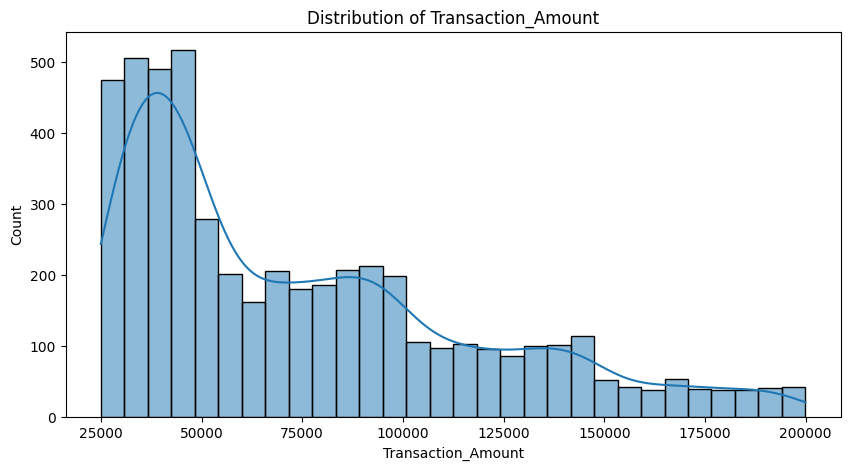

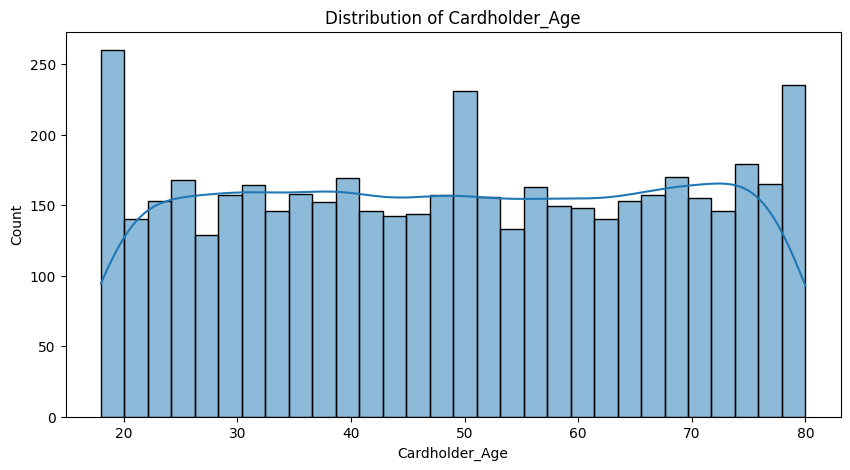

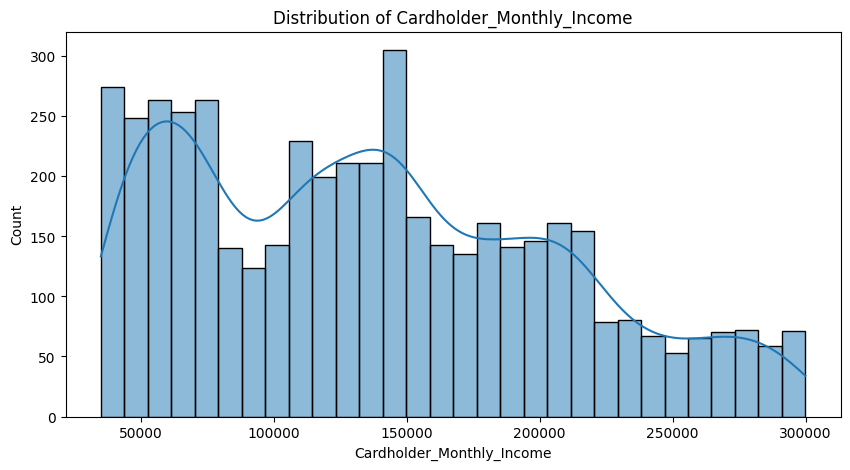

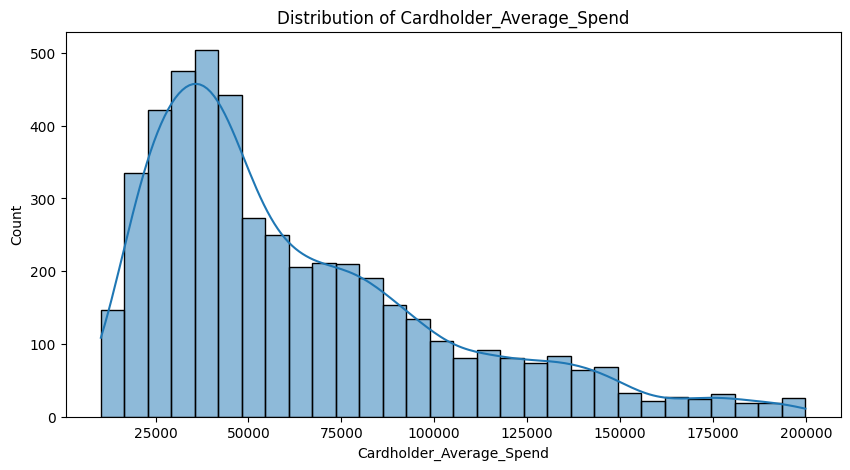

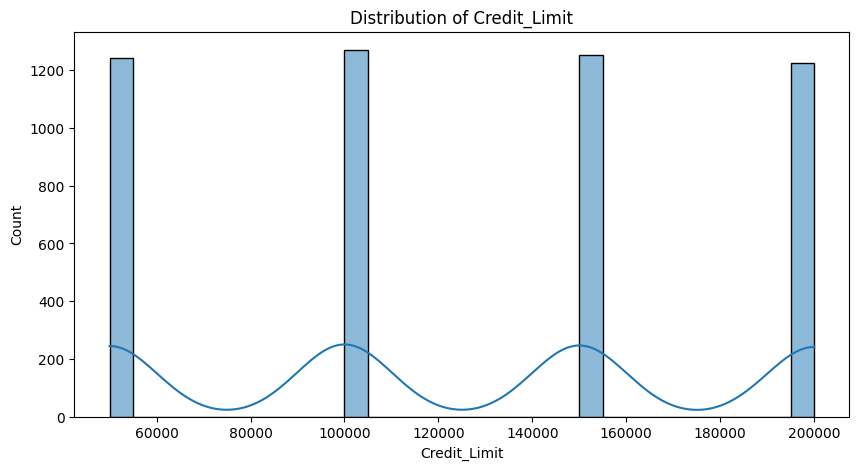

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    # Histogram
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

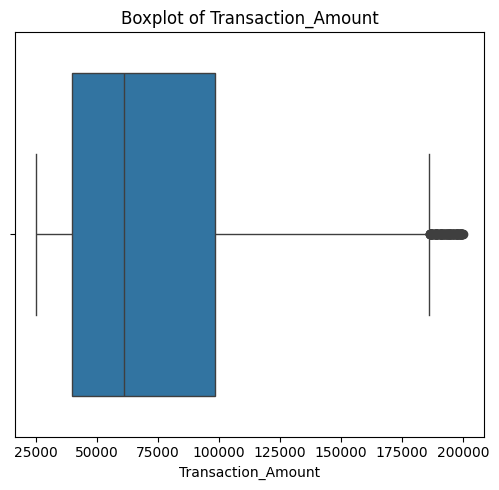

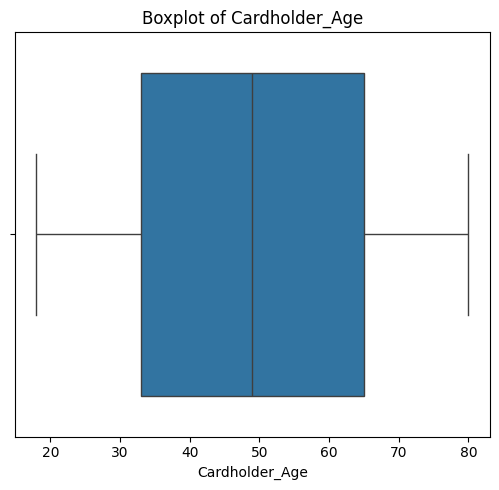

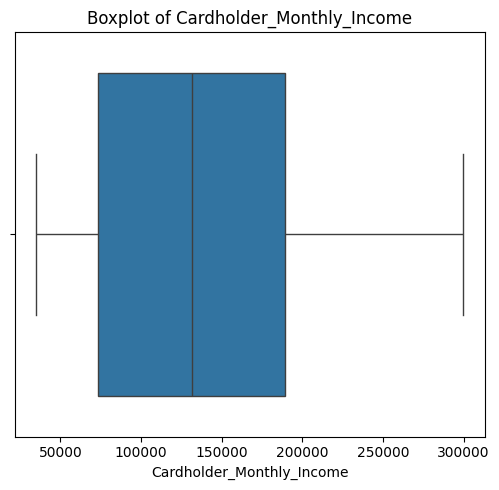

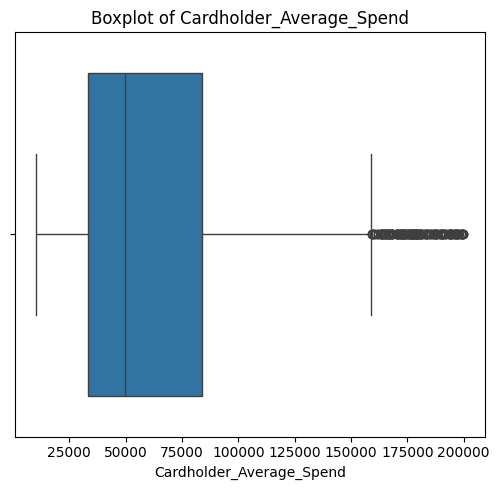

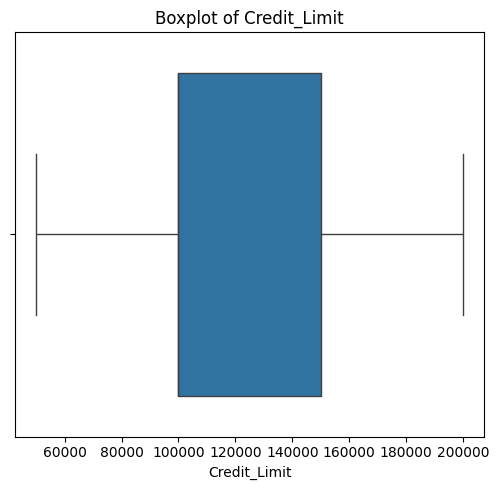

In [ ]:
# Plot boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

**c) Conduct bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable (Is_Fraudulent).**

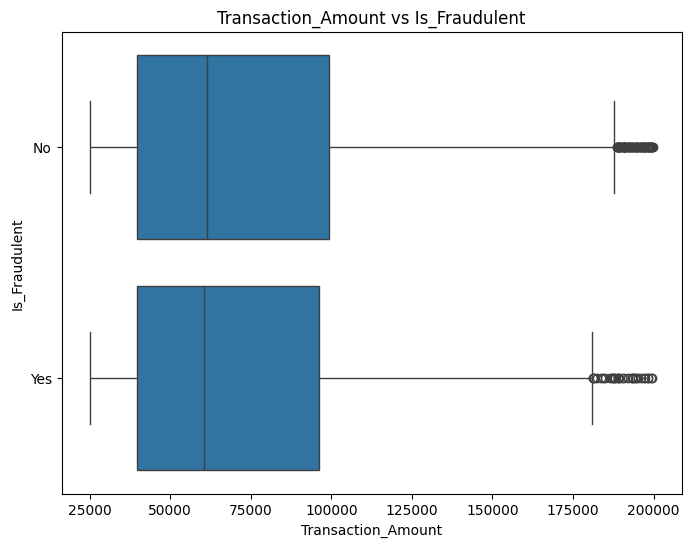

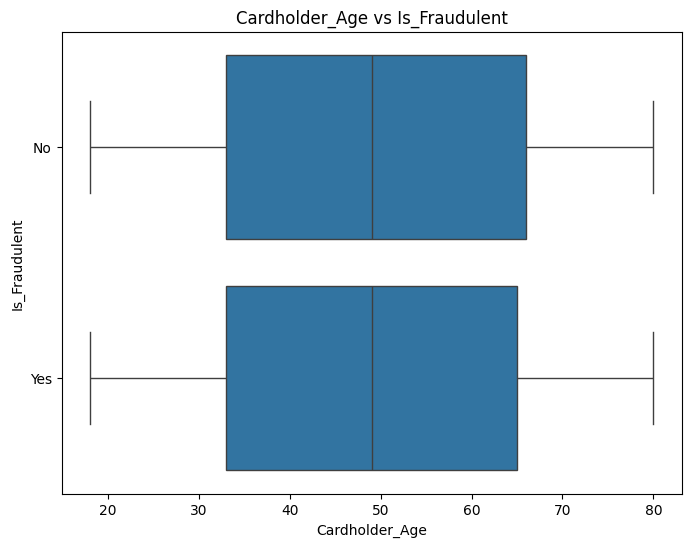

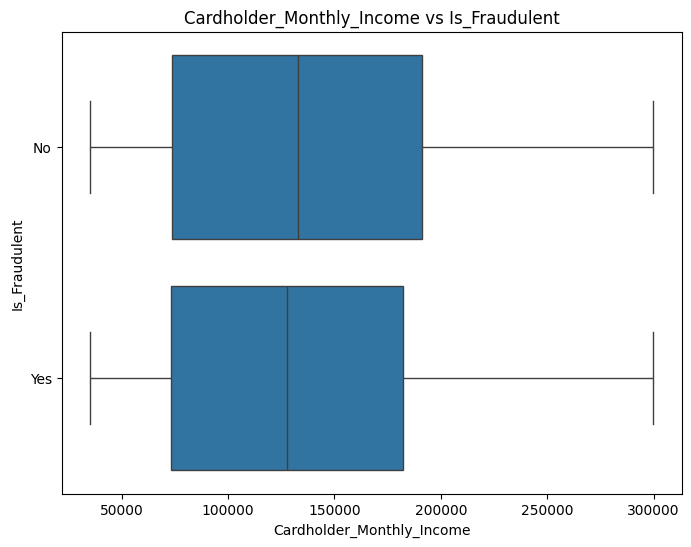

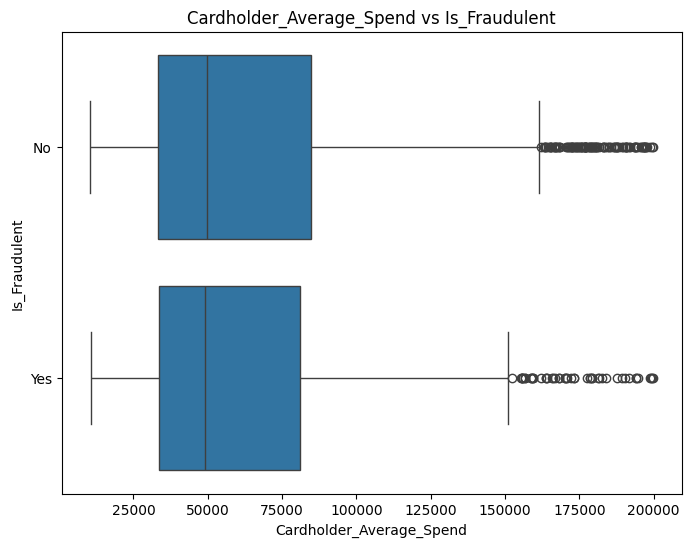

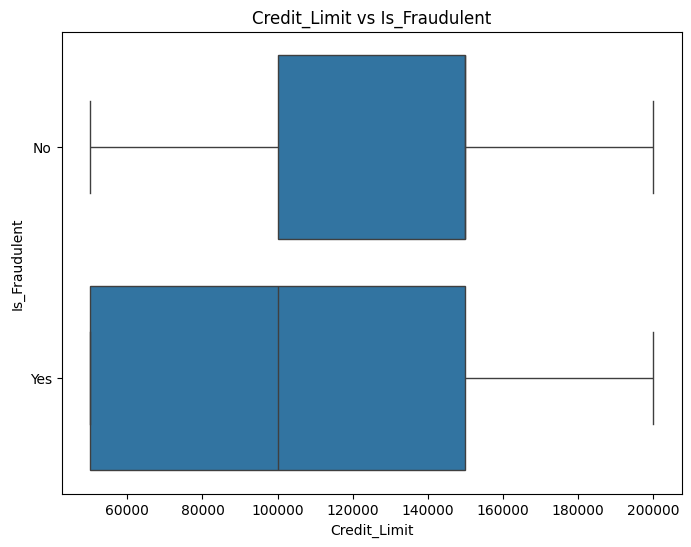

In [ ]:
# Boxplot of numerical features against Is_Fraudulent
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Is_Fraudulent', data=df)
    plt.title(f'{col} vs Is_Fraudulent')
    plt.show()


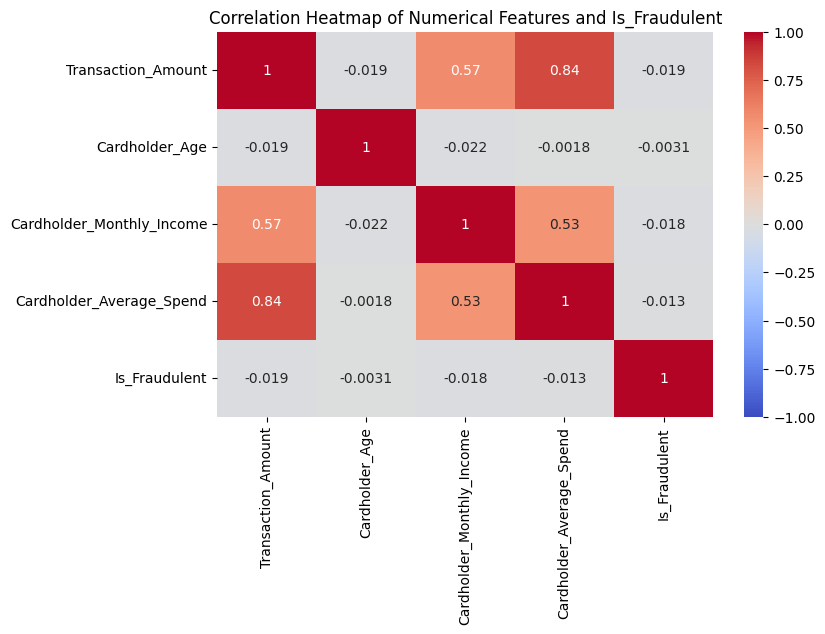

In [ ]:

df['Is_Fraudulent'] = df['Is_Fraudulent'].map({'Yes': 1, 'No': 0})

# List of numerical features to analyze, including the target variable
numerical_features = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Is_Fraudulent']

# Compute the correlation matrix
corr_matrix = df[numerical_features].corr()

# Set up the figure size
plt.figure(figsize=(8, 5))

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Title for the heatmap
plt.title('Correlation Heatmap of Numerical Features and Is_Fraudulent')

# Show the plot
plt.show()

**d) Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.**

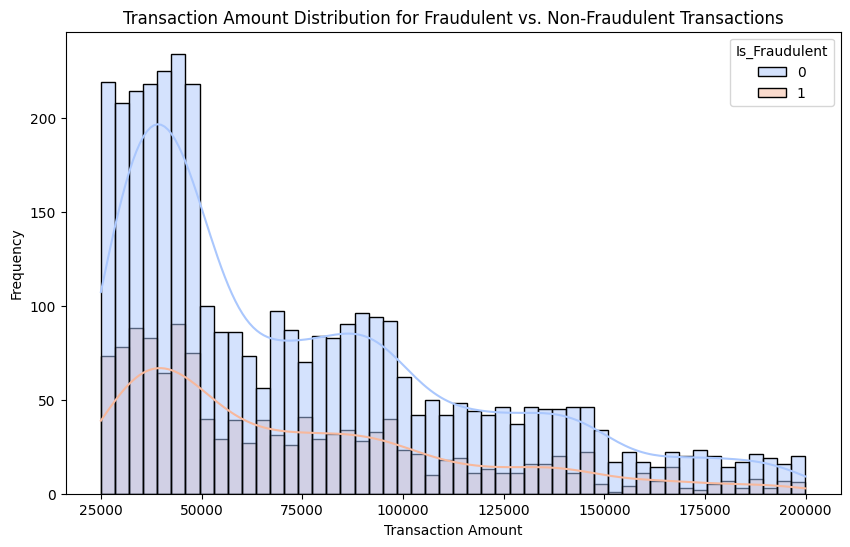

In [ ]:
# Histogram for Transaction_Amount, split by Is_Fraudulent
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent', bins=50, kde=True, palette='coolwarm')
plt.title('Transaction Amount Distribution for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

**e) Investigate whether certain features are more susceptible to fraud.**

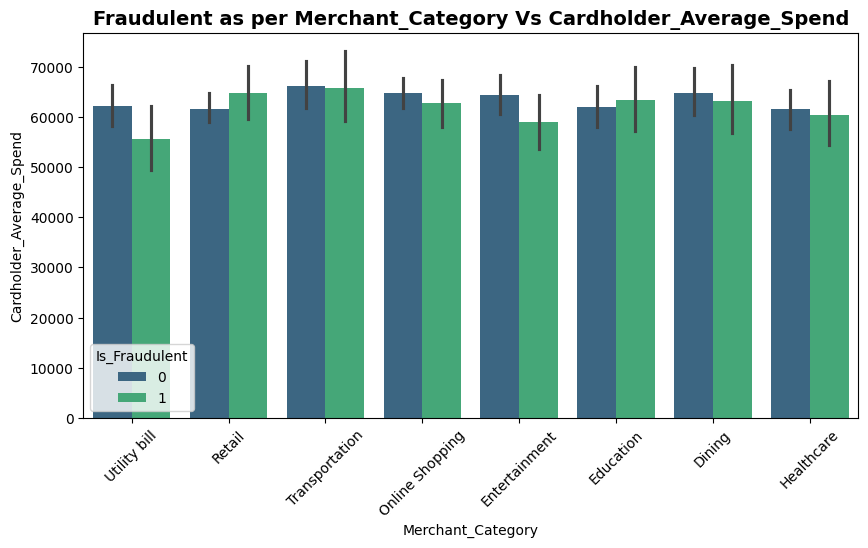

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Merchant_Category",y="Cardholder_Average_Spend",hue="Is_Fraudulent",palette="viridis",data=df)
plt.title('Fraudulent as per Merchant_Category Vs Cardholder_Average_Spend',fontsize=14, fontweight = 'bold')
plt.xticks(rotation=45)
plt.show()
#FRAUDULENT OCCURS MORE IN TRANSPORTATION CATEGORY

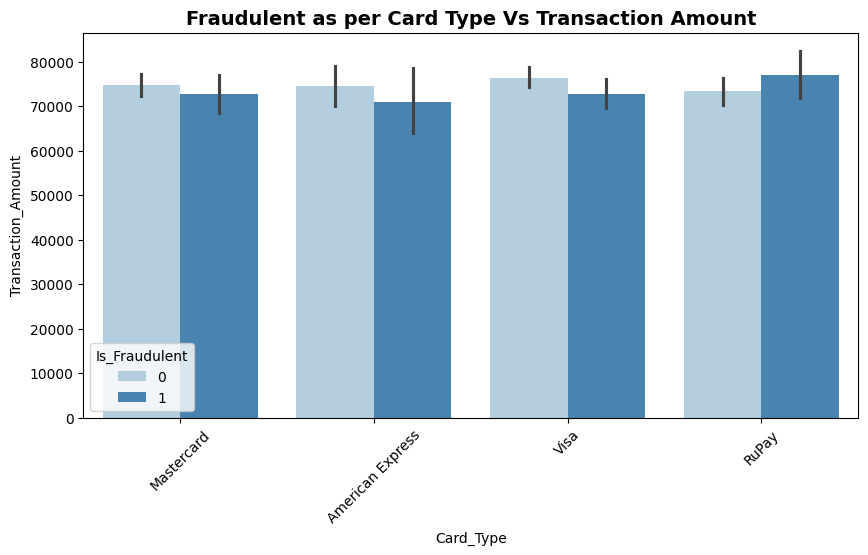

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Card_Type",y="Transaction_Amount",hue="Is_Fraudulent",palette="Blues",data=df)
plt.title('Fraudulent as per Card Type Vs Transaction Amount',fontsize=14, fontweight = 'bold')
plt.xticks(rotation=45)
plt.show()
#FRAUDULENT OCCURS MORE IN RUPAY CARD CATEGORY

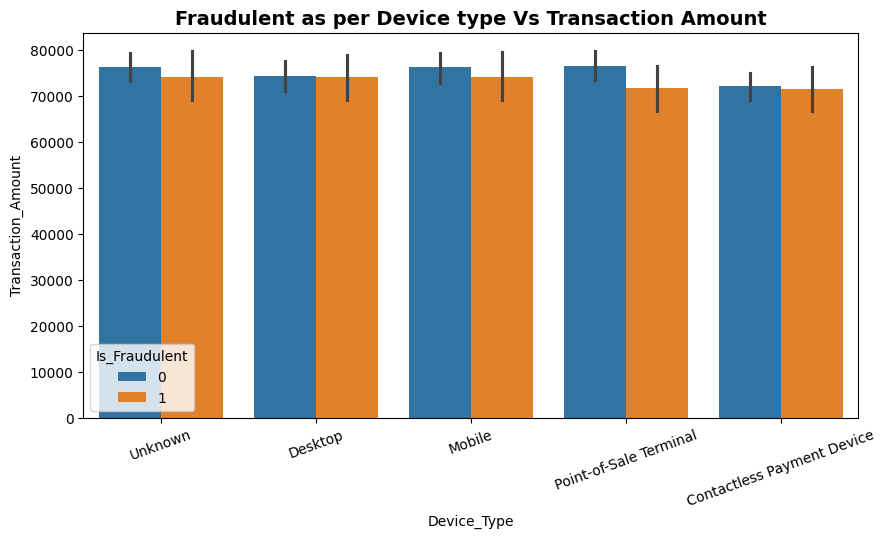

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Device_Type",y="Transaction_Amount",hue="Is_Fraudulent",data=df)
plt.title('Fraudulent as per Device type Vs Transaction Amount',fontsize=14, fontweight = 'bold')
plt.xticks(rotation=20)
plt.show()
#FRAUDULENT OCCURS MORE IN DESKTOP DEVICE CATEGORY

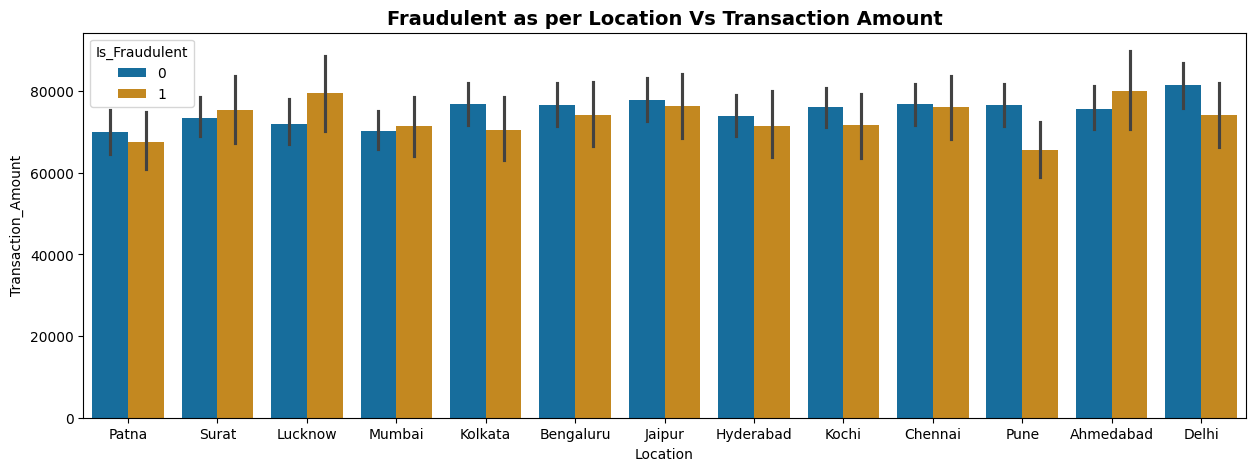

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x="Location",y="Transaction_Amount",hue="Is_Fraudulent",palette="colorblind",data= df)
plt.title('Fraudulent as per Location Vs Transaction Amount',fontsize=14, fontweight = 'bold')
plt.show()
#FRAUDULENT OCCURS MORE IN LUCKNOW LOCATION

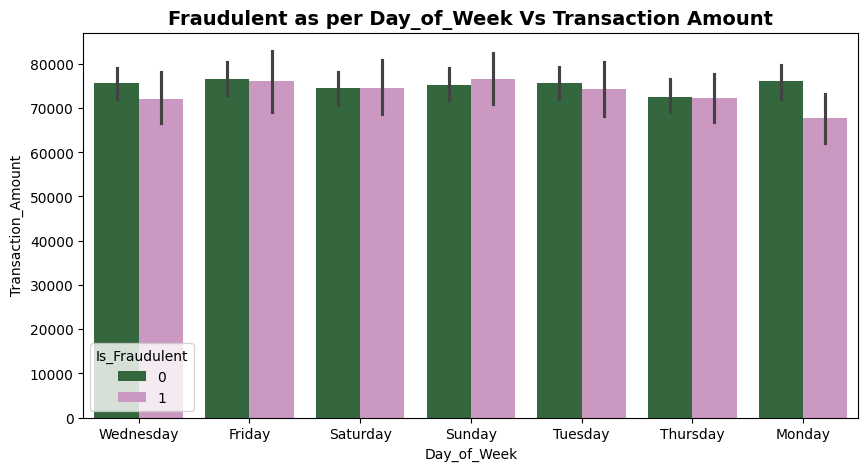

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Day_of_Week",y="Transaction_Amount",hue="Is_Fraudulent",palette="cubehelix",data=df)
plt.title('Fraudulent as per Day_of_Week Vs Transaction Amount',fontsize=14, fontweight = 'bold')
plt.show()
#FRAUDULENT OCCURS MORE IN SUNDAY

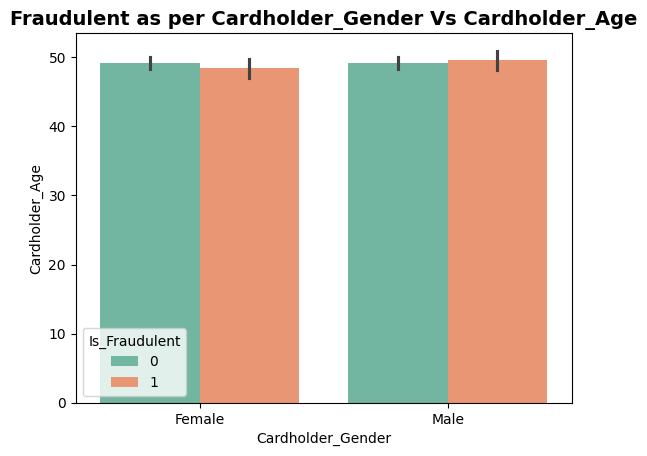

In [ ]:
sns.barplot(x="Cardholder_Gender",y="Cardholder_Age",hue="Is_Fraudulent",palette="Set2",data=df)
plt.title('Fraudulent as per Cardholder_Gender Vs Cardholder_Age',fontsize=14, fontweight = 'bold')
plt.show()
#FRAUDULENT OCCURS MORE AMONG MALE

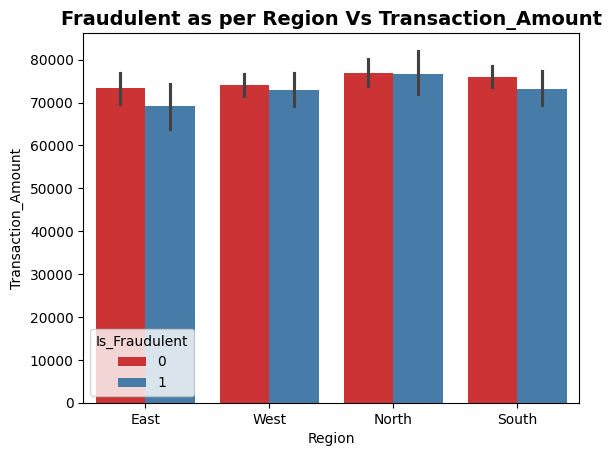

In [ ]:
sns.barplot(x="Region",y="Transaction_Amount",hue="Is_Fraudulent",palette="Set1",data=df)
plt.title('Fraudulent as per Region Vs Transaction_Amount',fontsize=14, fontweight = 'bold')
plt.show()
#FRAUDULENT OCCURS MORE AT NORTH

###**2) Data Preprocessing - Data Cleaning:**

**a)  Handle missing values if any, using appropriate techniques such as KNNImputer; mean or median imputation for numerical features, and mode imputation for categorical features.**

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,6
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,0
Cardholder_Monthly_Income,314
Cardholder_Average_Spend,208


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for column in categorical_cols:
  df[column] = le.fit_transform(df[column])

In [ ]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,10,0,23.0,0,94632.0,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,12,3,49.0,1,148118.0,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,10,0,NaN,1,210921.0,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,12,3,52.0,0,148070.0,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,8,1,37.0,0,174470.0,52713.09,200000.0,2,2,0


In [ ]:
from sklearn.impute import KNNImputer
imputer =KNNImputer(n_neighbors=5)
imputed_array =imputer.fit_transform(df)
df=pd.DataFrame(imputed_array,columns=df.columns)

In [ ]:
df.isnull().sum() # null values has been finished

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0
Cardholder_Average_Spend,0


**b) Check for outliers in numerical features using statistical methods like Z-score or IQR (Interquartile Range) and remove them if necessary to ensure data quality.**

In [ ]:
for column in numerical_cols:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR= q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
print(f"Column: \nQ1: {q1},\nQ3: {q3}, \nIQR: {IQR}, \nLower Bound: {lower_bound}, \nUpper Bound: {upper_bound}")

Column: 
Q1: 100000.0,
Q3: 150000.0, 
IQR: 50000.0, 
Lower Bound: 25000.0, 
Upper Bound: 225000.0


In [ ]:
df=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

**c) Assess skewness in numerical features by calculating the skewness score. If any features are highly skewed, consider applying transformations such as square root or log transformation to improve their distribution before scaling, if needed.**

In [ ]:
from scipy.stats import skew

In [ ]:
# Calculate skewness for each numerical feature
skewness = df[numerical_cols].skew()
print("\nSkewness of Numerical Features Transformation:")
print(skewness)


Skewness of Numerical Features Transformation:
Transaction_Amount           0.966925
Cardholder_Age              -0.012845
Cardholder_Monthly_Income    0.418452
Cardholder_Average_Spend     1.140931
Credit_Limit                 0.012094
dtype: float64


In [ ]:
skwness = df[["Card_Type","Merchant_Category","Location","Region","Cardholder_Age","Cardholder_Average_Spend","Device_Type","Day_of_Week","Is_Fraudulent"]]
for col in skwness:
  df[col] =df[col]**0.5

df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413.0,1.000000,2.645751,27214.0,3.162278,0.000000,4.795832,0.0,94632.0,190.708285,100000.0,2.000000,2.449490,0.0
1,4138.0,0.000000,2.236068,83956.0,3.464102,1.732051,7.000000,1.0,148118.0,298.628733,150000.0,1.000000,0.000000,0.0
2,3323.0,1.732051,2.449490,193280.0,3.162278,0.000000,6.511528,1.0,210921.0,326.601592,200000.0,1.000000,1.414214,0.0
3,3775.0,1.414214,2.000000,167381.0,3.464102,1.732051,7.211103,0.0,148070.0,416.119598,200000.0,1.000000,1.414214,1.0
4,1925.0,1.414214,2.236068,81170.0,2.828427,1.000000,6.082763,0.0,174470.0,229.593314,200000.0,1.414214,1.414214,0.0


###**3) Feature Engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
df[categorical_cols].head()

,Transaction_ID,Card_Type,Merchant_Category,Location,Region,Cardholder_Gender,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,10,0,0,4,6,0
1,4138,0,5,12,3,1,1,0,0
2,3323,3,6,10,0,1,1,2,0
3,3775,2,4,12,3,0,1,2,1
4,1925,2,5,8,1,0,2,2,0


###**4) Feature Selection:**

In [ ]:
X = df.drop(columns=['Transaction_ID', 'Is_Fraudulent'])
y = df['Is_Fraudulent']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X, y)

SelectKBest(k=5)

In [ ]:
df.head().round(1)

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,10,0,4.8,0,94632.0,190.7,100000.0,4,6,0
1,4138,0,5,83956.0,12,3,7.0,1,148118.0,298.6,150000.0,1,0,0
2,3323,3,6,193280.0,10,0,6.5,1,210921.0,326.6,200000.0,1,2,0
3,3775,2,4,167381.0,12,3,7.2,0,148070.0,416.1,200000.0,1,2,1
4,1925,2,5,81170.0,8,1,6.1,0,174470.0,229.6,200000.0,2,2,0


###**5) Split data into training and testing:**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the target variable
# 80% training and 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 12), (1000, 12), (4000,), (1000,))

###**6) Feature Scaling:**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,10,0,4.795832,0,94632.0,190.708285,100000.0,4,6,0
1,4138,0,5,83956.0,12,3,7.000000,1,148118.0,298.628733,150000.0,1,0,0
2,3323,3,6,193280.0,10,0,6.511528,1,210921.0,326.601592,200000.0,1,2,0
3,3775,2,4,167381.0,12,3,7.211103,0,148070.0,416.119598,200000.0,1,2,1
4,1925,2,5,81170.0,8,1,6.082763,0,174470.0,229.593314,200000.0,2,2,0


###**7) Build the Machine Learning Model:**

In [ ]:
#a) Import the necessary modules and libraries for building and evaluating machine learning models.
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define a dictionary of classifiers to be evaluated
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Dictionary to store the evaluation metrics
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results[name] = {"Accuracy": accuracy, "F1-Score": f1}

# Display the evaluation metrics for each classifier
print("\nEvaluation Metrics for Each Classifier:")
for clf_name, metrics in results.items():
    print(f"{clf_name}: Accuracy = {metrics['Accuracy']:.4f}, F1-Score = {metrics['F1-Score']:.4f}")


Evaluation Metrics for Each Classifier:
Logistic Regression: Accuracy = 0.7530, F1-Score = 0.0000
Naive Bayes: Accuracy = 0.7530, F1-Score = 0.0000
Decision Tree: Accuracy = 0.6290, F1-Score = 0.3291
Random Forest: Accuracy = 0.7480, F1-Score = 0.0000
K-Nearest Neighbors: Accuracy = 0.6940, F1-Score = 0.1547
SVM: Accuracy = 0.7530, F1-Score = 0.0000


In [ ]:
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Naive Bayes,Decision Tree,Random Forest,K-Nearest Neighbors,SVM
Accuracy,0.753,0.753,0.629000,0.748,0.694000,0.753
F1-Score,0.000,0.000,0.329114,0.000,0.154696,0.000


In [ ]:
#c) Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.

# Find the model with the highest F1-score
best_model_name = max(results, key=lambda name: results[name]['F1-Score'])
best_model_metrics = results[best_model_name]

print(f"\nSelected Model: {best_model_name}")
print(f"Accuracy: {best_model_metrics['Accuracy']:.4f}")
print(f"F1-Score: {best_model_metrics['F1-Score']:.4f}")


Selected Model: Decision Tree
Accuracy: 0.6290
F1-Score: 0.3291


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Retrieve the best-performing model from our dictionary
best_model = classifiers[best_model_name]

# Train the model on the training dataset
best_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute and display the classification report (which includes precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"\nPerformance Evaluation of {best_model_name}:")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Performance Evaluation of Decision Tree:
Confusion Matrix:
[[533 220]
 [162  85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       753
           1       0.28      0.34      0.31       247

    accuracy                           0.62      1000
   macro avg       0.52      0.53      0.52      1000
weighted avg       0.65      0.62      0.63      1000



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print("\nValidation Metrics for the Selected Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Validation Metrics for the Selected Model:
Accuracy: 0.6180
Precision: 0.2787
Recall: 0.3441
F1-Score: 0.3080


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[533 220]
 [162  85]]
